# Importing Libraries

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

# Loading data from Google Drive

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
import os

# Example: Copy a folder from Google Drive to Colab
source_folder_path = '/content/drive/MyDrive/Datasets/flowers'
destination_folder_path = '/content/dataset/flowers'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder_path, exist_ok=True)

# Copy the entire folder (including subdirectories and files)
shutil.copytree(source_folder_path, destination_folder_path, dirs_exist_ok=True)

# List contents of the destination folder in Colab
print("Contents of the destination folder:")
print(os.listdir(destination_folder_path))


Contents of the destination folder:
['f30.jpeg', 'f62.jpeg', 'f56.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.56 PM.jpeg', 'f33.jpeg', 'f16.jpeg', 'f20.jpeg', 'f67.jpeg', 'f51.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.57 PM.jpeg', 'f24.jpeg', 'f17.jpeg', 'cotton-thistle.jpg', 'f66.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.58 PM (4).jpeg', 'f18.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.57 PM (1).jpeg', 'f33 copy.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.56 PM (4).jpeg', 'WhatsApp Image 2023-04-16 at 8.53.41 PM.jpeg', '22569380101_5fbc27b72c_b.jpg', 'f4.jpeg', 'f54.jpeg', 'f22.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.58 PM (5).jpeg', 'WhatsApp Image 2023-04-16 at 8.53.44 PM.jpeg', 'f55.jpeg', 'f60.jpeg', 'f6.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.59 PM.jpeg', 'f52.jpeg', 'f59.jpeg', 'f48.jpeg', 'WhatsApp Image 2023-04-16 at 8.53.56 PM (1).jpeg', 'WhatsApp Image 2023-04-16 at 8.53.58 PM (8).jpeg', 'WhatsApp Image 2023-04-16 at 8.53.58 PM (11).jpeg', 'WhatsApp Image 2023-04-16 at 8.53.41

In [4]:
import shutil
import os

# Example: Copy a folder from Google Drive to Colab
source_folder_path = '/content/drive/MyDrive/Datasets/dogs'
destination_folder_path = '/content/dataset/dogs'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder_path, exist_ok=True)

# Copy the entire folder (including subdirectories and files)
shutil.copytree(source_folder_path, destination_folder_path, dirs_exist_ok=True)

# List contents of the destination folder in Colab
print("Contents of the destination folder:")
print(os.listdir(destination_folder_path))


Contents of the destination folder:
['dog.2009.jpg', 'dog.2199.jpg', 'dog.2421.jpg', 'dog.2259.jpg', 'dog.2044.jpg', 'dog.2304.jpg', 'dog.2350.jpg', 'dog.2161.jpg', 'dog.2071.jpg', 'dog.2103.jpg', 'dog.2081.jpg', 'dog.2327.jpg', 'dog.2213.jpg', 'dog.2403.jpg', 'dog.2039.jpg', 'dog.2337.jpg', 'dog.2456.jpg', 'dog.2275.jpg', 'dog.2080.jpg', 'dog.2093.jpg', 'dog.2176.jpg', 'dog.2346.jpg', 'dog.2321.jpg', 'dog.2363.jpg', 'dog.2201.jpg', 'dog.2297.jpg', 'dog.2441.jpg', 'dog.2270.jpg', 'dog.2041.jpg', 'dog.2499.jpg', 'dog.2132.jpg', 'dog.2125.jpg', 'dog.2180.jpg', 'dog.2460.jpg', 'dog.2359.jpg', 'dog.2263.jpg', 'dog.2381.jpg', 'dog.2480.jpg', 'dog.2255.jpg', 'dog.2424.jpg', 'dog.2295.jpg', 'dog.2473.jpg', 'dog.2068.jpg', 'dog.2411.jpg', 'dog.2378.jpg', 'dog.2134.jpg', 'dog.2340.jpg', 'dog.2218.jpg', 'dog.2455.jpg', 'dog.2114.jpg', 'dog.2179.jpg', 'dog.2354.jpg', 'dog.2042.jpg', 'dog.2034.jpg', 'dog.2196.jpg', 'dog.2099.jpg', 'dog.2137.jpg', 'dog.2436.jpg', 'dog.2032.jpg', 'dog.2003.jpg', 'do

In [5]:
import shutil
import os

# Example: Copy a folder from Google Drive to Colab
source_folder_path = '/content/drive/MyDrive/Datasets/signs'
destination_folder_path = '/content/dataset/signs'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder_path, exist_ok=True)

# Copy the entire folder (including subdirectories and files)
shutil.copytree(source_folder_path, destination_folder_path, dirs_exist_ok=True)

# List contents of the destination folder in Colab
print("Contents of the destination folder:")
print(os.listdir(destination_folder_path))


Contents of the destination folder:
['Screenshot 2023-04-18 024319.png', '20230415_195705.jpg', 'Screenshot 2023-04-17 192517.png', 'Screenshot 2023-04-18 024038.png', 'Screenshot 2023-04-18 020054.png', 'Screenshot 2023-04-18 024657.png', 'Screenshot 2023-04-18 024246.png', 'Screenshot 2023-04-18 015827.png', '20230415_194057.jpg', '20230415_200341.jpg', 'Screenshot 2023-04-18 015344.png', 'Screenshot 2023-04-18 015236.png', '20230415_194918.jpg', 'Screenshot 2023-04-18 025455.png', 'Screenshot 2023-04-18 024601.png', '20230415_193513.jpg', '20230415_194715.jpg', 'Screenshot 2023-04-18 025101.png', '20230415_195920.jpg', '20230415_194337.jpg', '20230415_194839.jpg', 'Screenshot 2023-04-18 015319.png', '20230415_200243.jpg', 'Screenshot 2023-04-18 024013.png', 'Screenshot 2023-04-18 024150.png', '20230416_103303.jpg', '20230415_200640.jpg', 'Screenshot 2023-04-18 025700.png', 'Screenshot 2023-04-18 024623.png', 'Screenshot 2023-04-18 014855.png', '20230415_195646.jpg', 'Screenshot 2023

# Question No 01
Take at least 100 images per class with at least 3 classes using your phone/camera (e.g. take photos of different types of trees, flowers or animals). Display 5 examples from each class.


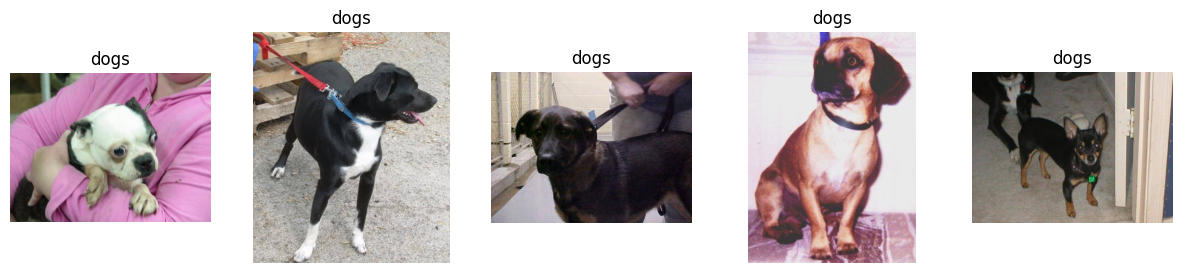

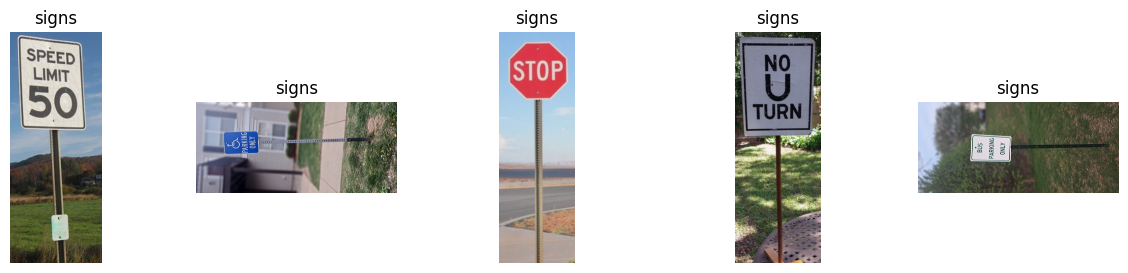

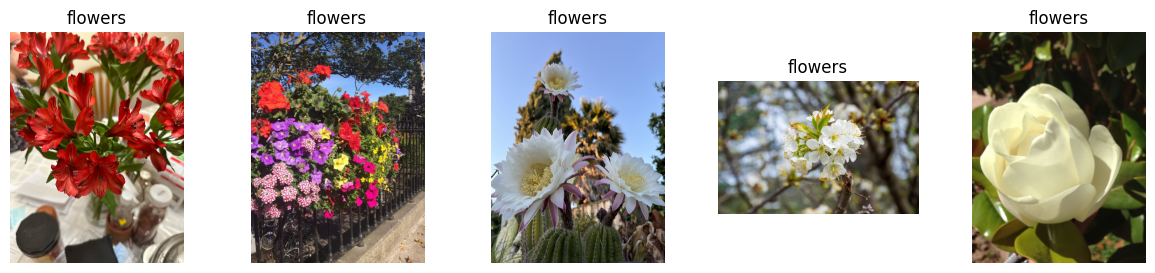

In [7]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

test_folder = 'dataset/'  # Replace with the path to your test folder
classes = ['dogs', 'signs', 'flowers']  # List of class names

# Function to display images
def display_images(images, labels):
    plt.figure(figsize=(15, 3))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Randomly select and display 5 images from each class
for class_name in classes:
    class_folder = os.path.join(test_folder, class_name)
    images = []
    labels = []

    # Randomly select 5 images from the class folder
    for _ in range(5):
        image_name = random.choice(os.listdir(class_folder))
        image_path = os.path.join(class_folder, image_name)
        img = Image.open(image_path)
        images.append(img)
        labels.append(class_name)

    # Display the selected images for the current class
    display_images(images, labels)


# Question No 02
Split the images into a training set, a validation set, and a test set. [5 points]

# Creating the train test dataset as well as augmentation pipeline

In [9]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the main data directory
data_path = 'dataset/'

# Target size for resizing images
target_size = (150, 150)

# Batch size for the generator
batch_size = 32

# Create a dictionary to store the split data
data_split = {'train': {}, 'test': {}, 'validation': {}}

# Loop through each flower class
for sample_class in os.listdir(data_path):
    class_path = os.path.join(data_path, sample_class)
    print(class_path)
    # Get a list of all images in the class
    images = [img for img in os.listdir(class_path) if (img.endswith('.jpg') or img.endswith('.jpeg'))]

    # Split the data into train, test, and validation sets
    train_images, test_validation_images = train_test_split(images, test_size=0.4, random_state=42)
    test_images, validation_images = train_test_split(test_validation_images, test_size=0.5, random_state=42)

    # Update the data_split dictionary
    data_split['train'][sample_class] = train_images
    data_split['test'][sample_class] = test_images
    data_split['validation'][sample_class] = validation_images

# Create directories for train, test, and validation
train_dir = 'dataset/train'
test_dir = 'dataset/test'
validation_dir = 'dataset/validation'

# Create train, test, and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Loop through each split (train, test, and validation)
for split, classes_data in data_split.items():
    split_dir = train_dir if split == 'train' else test_dir if split == 'test' else validation_dir

    # Loop through each flower class
    for sample_class, images in classes_data.items():
        # Create a subdirectory for the class in the split directory
        class_dir = os.path.join(split_dir, sample_class)
        os.makedirs(class_dir, exist_ok=True)

        # Copy images to the respective directories
        for image in images:
            src_path = os.path.join(data_path, sample_class, image)
            dst_path = os.path.join(class_dir, image)
            os.replace(src_path, dst_path)

        # Print the length of each class and images inside it
        print(f"{split.capitalize()} - Class: {sample_class}, Length: {len(images)}, Images: {images}")


dataset/dogs
dataset/flowers
dataset/signs
Train - Class: dogs, Length: 240, Images: ['dog.2257.jpg', 'dog.2173.jpg', 'dog.2246.jpg', 'dog.2234.jpg', 'dog.2365.jpg', 'dog.2446.jpg', 'dog.2370.jpg', 'dog.2142.jpg', 'dog.2465.jpg', 'dog.2463.jpg', 'dog.2481.jpg', 'dog.2200.jpg', 'dog.2240.jpg', 'dog.2178.jpg', 'dog.2166.jpg', 'dog.2420.jpg', 'dog.2249.jpg', 'dog.2384.jpg', 'dog.2077.jpg', 'dog.2363.jpg', 'dog.2480.jpg', 'dog.2057.jpg', 'dog.2296.jpg', 'dog.2274.jpg', 'dog.2386.jpg', 'dog.2338.jpg', 'dog.2089.jpg', 'dog.2053.jpg', 'dog.2253.jpg', 'dog.2281.jpg', 'dog.2266.jpg', 'dog.2299.jpg', 'dog.2028.jpg', 'dog.2090.jpg', 'dog.2205.jpg', 'dog.2469.jpg', 'dog.2016.jpg', 'dog.2162.jpg', 'dog.2226.jpg', 'dog.2320.jpg', 'dog.2063.jpg', 'dog.2410.jpg', 'dog.2476.jpg', 'dog.2372.jpg', 'dog.2336.jpg', 'dog.2074.jpg', 'dog.2255.jpg', 'dog.2327.jpg', 'dog.2091.jpg', 'dog.2492.jpg', 'dog.2478.jpg', 'dog.2303.jpg', 'dog.2052.jpg', 'dog.2156.jpg', 'dog.2287.jpg', 'dog.2036.jpg', 'dog.2109.jpg', 'd

# Question no 03
Build the input pipeline, including the appropriate preprocessing operations, and add data augmentation.

# Data Augmentation for training data


In [18]:
from keras.applications.mobilenet import preprocess_input
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


# Create generators for training and testing sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)


Found 324 images belonging to 3 classes.
Found 108 images belonging to 3 classes.


# Pipeline Steps

1. **ImageDataGenerator Configuration:**
   - `train_datagen`: Configured with data augmentation techniques such as shearing, zooming, and horizontal flipping. It also applies the MobileNet-specific preprocessing function `preprocess_input` to the input images.
   - `test_datagen`: Configured without data augmentation, only applying the `preprocess_input` function.

2. **Generators Creation:**
   - `train_generator`: Created using `train_datagen.flow_from_directory` for the training set. It specifies the target image size, batch size, class mode ('categorical' for one-hot encoded labels), and color mode ('rgb').
   - `test_generator`: Created using `test_datagen.flow_from_directory` for the testing set with similar configuration.

### Purpose and Significance:

1. **Data Augmentation:**
   - Data augmentation is crucial for training deep learning models effectively, especially when dealing with limited datasets. It helps to artificially increase the diversity of the training set by applying random transformations to the input images.

2. **Transfer Learning with MobileNet:**
   - MobileNet is a lightweight CNN architecture that is well-suited for mobile and embedded devices. By using transfer learning, we leverage the knowledge gained by MobileNet during pre-training on a large dataset. The `preprocess_input` function ensures that the input images are preprocessed in a manner consistent with the training of MobileNet.

3. **ImageDataGenerator:**
   - Keras' `ImageDataGenerator` simplifies the process of loading, preprocessing, and augmenting images. It generates batches of augmented images on-the-fly during model training, reducing the need for extensive manual data preprocessing.

4. **Color Mode and Batch Size:**
   - The specification of `color_mode='rgb'` ensures that images are treated as RGB (3-channel) images. The chosen batch size (`batch_size`) determines the number of images processed in each training step.

In summary, this code provides a streamlined and efficient way to prepare image data for training a deep learning model, specifically tailored for transfer learning with MobileNet. The use of data augmentation and proper preprocessing ensures that the model generalizes well to diverse and previously unseen data, leading to improved performance and robustness.


# Preprocessing for MobileNet Dataset
The `preprocess_input` function provided by Keras for MobileNet performs specific preprocessing operations on input images. These operations are crucial to ensure that the input data is formatted and scaled in a way that aligns with the preprocessing used during the training of the MobileNet model.



1. **Normalization:**
   - The function normalizes pixel values of the input images. In the case of MobileNet, which was trained on the ImageNet dataset, the normalization involves subtracting the mean values computed over all the images in the ImageNet dataset. This step helps center the pixel values around zero.

2. **Channel-wise Color Standardization:**
   - The function performs channel-wise color standardization. Each color channel (Red, Green, Blue) is normalized independently. This ensures that the model is presented with input data in a consistent and standardized format.

3. **Resizing:**
   - The function may also resize the input images to the expected input size of the MobileNet model. MobileNet typically expects input images to be of size (224, 224, 3), where 224 is the height and width, and 3 represents the three color channels (RGB).

The goal of these preprocessing steps is to make the input data conform to the format and statistical characteristics that the MobileNet model has been trained on. This ensures that the model receives input data in a consistent manner during both training and inference, which is essential for accurate predictions.

In summary, the `preprocess_input` function is responsible for normalizing pixel values, standardizing color channels, and potentially resizing input images to prepare them for use with the MobileNet model during transfer learning.

# Question 04
Fine-tune a pretrained model of your choice on this dataset (the one you created in part 3). Report classification accuracy and give a few examples of correct/incorrect classification (show a few images that were correctly/incorrectly classified). [10 points]

# Loading the MobileNet model

In [19]:
from keras.applications.mobilenet import MobileNet


# MobileNet model
conv_base = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

17225924/17225924 [==============================] - 0s 0us/step


In [20]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32) 

# Fine Tuning the model

In [21]:
# Set the entire MobileNet model as trainable
conv_base.trainable = True

# Variable to control whether to set subsequent layers as trainable
set_trainable = False


for layer in conv_base.layers:
    # Check if the current layer is 'conv_pw_13'
    if layer.name == 'conv_pw_13':
        # Once this layer is encountered, set subsequent layers as trainable
        set_trainable = True

    # Check whether to set the current layer as trainable or not
    if set_trainable:
        # Set the layer as trainable
        layer.trainable = True
    else:
        # Set the layer as not trainable
        layer.trainable = False

# Loop through all layers again to print names and trainable status
for layer in conv_base.layers:
    # Print the name and trainable status of each layer
    print(layer.name, layer.trainable)


input_1 False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 False
conv_dw_2 False
conv_dw_2_bn False
conv_dw_2_relu False
conv_pw_2 False
conv_pw_2_bn False
conv_pw_2_relu False
conv_dw_3 False
conv_dw_3_bn False
conv_dw_3_relu False
conv_pw_3 False
conv_pw_3_bn False
conv_pw_3_relu False
conv_pad_4 False
conv_dw_4 False
conv_dw_4_bn False
conv_dw_4_relu False
conv_pw_4 False
conv_pw_4_bn False
conv_pw_4_relu False
conv_dw_5 False
conv_dw_5_bn False
conv_dw_5_relu False
conv_pw_5 False
conv_pw_5_bn False
conv_pw_5_relu False
conv_pad_6 False
conv_dw_6 False
conv_dw_6_bn False
conv_dw_6_relu False
conv_pw_6 False
conv_pw_6_bn False
conv_pw_6_relu False
conv_dw_7 False
conv_dw_7_bn False
conv_dw_7_relu False
conv_pw_7 False
conv_pw_7_bn False
conv_pw_7_relu False
conv_dw_8 False
conv_dw_8_bn False
conv_dw_8_relu False
conv_pw_8 False
conv_pw_8_bn False
conv_pw_8_relu F

In [22]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32) 

In [23]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Change 'number_of_classes' to the actual number of classes

# Compile the model with an appropriate optimizer, loss, and metrics for multiclass classification
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine Tuning Process
Here's a summary of the fine-tuning process:

1. **Set Entire MobileNet Model as Trainable:**
   - The entire MobileNet model, including its convolutional base, is set as trainable. This allows weights to be updated during training on a new task.

2. **Control Trainability of Subsequent Layers:**
   - The code iterates through the layers of the MobileNet model.
   - When it encounters the layer with the name 'conv_pw_13', it signals to start setting subsequent layers as trainable.
   - Subsequent layers are then either set as trainable or frozen based on the value of `set_trainable`, effectively fine-tuning the model from the specified layer onward.

3. **Print Trainability of Each Layer:**
   - After the fine-tuning setup, the code prints the name and trainable status of each layer in the MobileNet model. This provides visibility into which layers are trainable and which are frozen.

4. **Build a New Model for Classification:**
   - A new Sequential model is created for classification, starting with the pre-trained MobileNet model.
   - It includes a Flatten layer to transform the 4D tensor output of the MobileNet model into a 2D tensor.
   - Followed by a Dense layer with 256 units and ReLU activation for feature extraction and a final Dense layer with softmax activation for multi-class classification.

5. **Compile the Model:**
   - The new model is compiled with the 'adagrad' optimizer, 'categorical_crossentropy' loss, and accuracy as the evaluation metric.
   - The choice of optimizer and loss function is suitable for multi-class classification tasks.

Overall, the fine-tuning steps allow the MobileNet model to be adapted to a new dataset, with specific layers being fine-tuned while leveraging the knowledge gained from pre-training on ImageNet. This process is crucial when the new dataset shares similarities with the original dataset used for pre-training, improving the model's ability to generalize to the new task.

In [24]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=test_generator)

Epoch 1/10
11/11 [==============================] - 22s 2s/step - loss: 0.6235 - accuracy: 0.8056 - val_loss: 0.1101 - val_accuracy: 0.9815
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 0.0367 - accuracy: 0.9907 - val_loss: 0.1343 - val_accuracy: 0.9630
Epoch 3/10
11/11 [==============================] - 19s 2s/step - loss: 0.0330 - accuracy: 0.9907 - val_loss: 0.0781 - val_accuracy: 0.9815
Epoch 4/10
11/11 [==============================] - 17s 2s/step - loss: 0.0273 - accuracy: 0.9938 - val_loss: 0.0601 - val_accuracy: 0.9815
Epoch 5/10
11/11 [==============================] - 17s 1s/step - loss: 0.0215 - accuracy: 0.9969 - val_loss: 0.0453 - val_accuracy: 0.9907
Epoch 6/10
11/11 [==============================] - 16s 1s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9907
Epoch 7/10
11/11 [==============================] - 22s 2s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9815
Epoch 8/10
11/11 [==

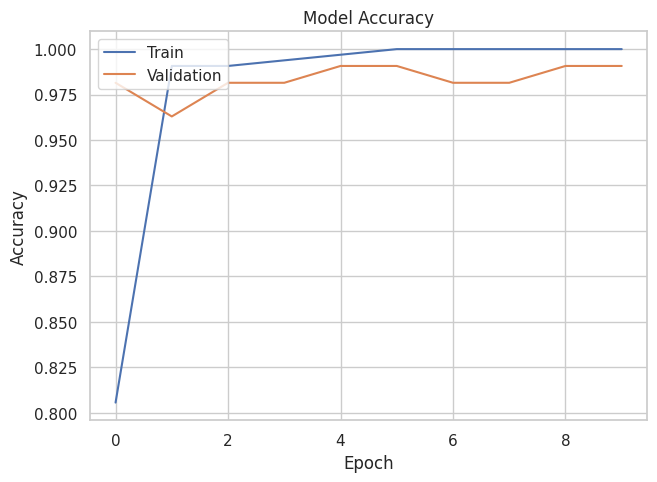

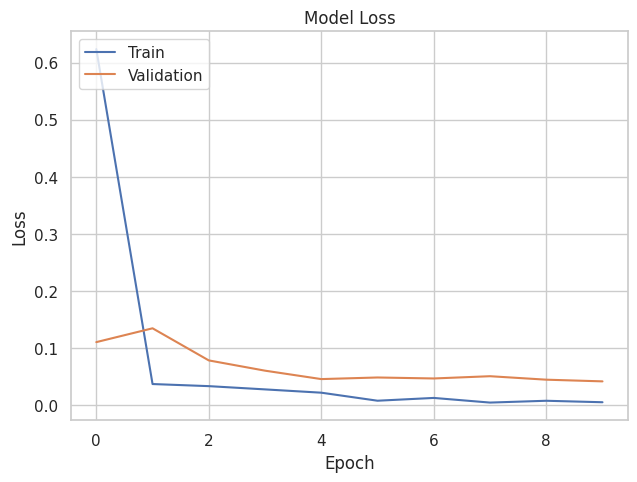

In [25]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Making Predictions


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions on the test set
y_pred = model.predict_generator(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes


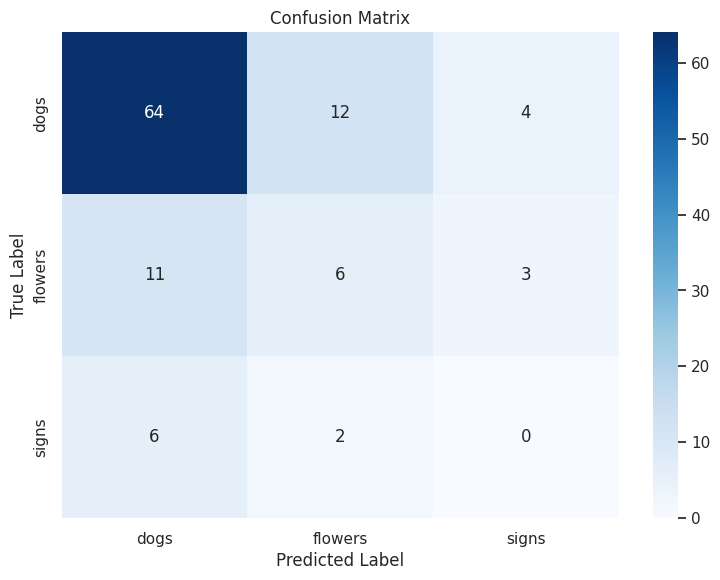

In [29]:
confusion_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [28]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        80
           1       0.30      0.30      0.30        20
           2       0.00      0.00      0.00         8

    accuracy                           0.65       108
   macro avg       0.36      0.37      0.37       108
weighted avg       0.64      0.65      0.64       108



# Incorrect Images


In [35]:
import pandas as pd

# Show the length of test_generator
num_images = len(test_generator.filenames)
print(f"Number of Images in Test Set: {num_images}")

# Get predicted labels
predicted_labels = model.predict_generator(test_generator)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Get actual image paths
actual_image_paths = [os.path.join(test_generator.directory, filename) for filename in test_generator.filenames]

# Create a DataFrame
df_results = pd.DataFrame({
    'Image_Path': actual_image_paths,
    'Predicted_Label': predicted_classes,
    'True_Label': test_generator.classes
})

# Display the DataFrame
print("\nDataFrame of Results:")
print(df_results.head())


Number of Images in Test Set: 108

DataFrame of Results:
                       Image_Path  Predicted_Label  True_Label
0  dataset/test/dogs/dog.2002.jpg                0           0
1  dataset/test/dogs/dog.2011.jpg                0           0
2  dataset/test/dogs/dog.2019.jpg                0           0
3  dataset/test/dogs/dog.2020.jpg                0           0
4  dataset/test/dogs/dog.2023.jpg                0           0


In [36]:
incorrect_predictions = df_results[df_results['Predicted_Label'] != df_results['True_Label']]
print("\nDataFrame of Incorrect Predictions:")
print(incorrect_predictions.head())



DataFrame of Incorrect Predictions:
                        Image_Path  Predicted_Label  True_Label
5   dataset/test/dogs/dog.2060.jpg                2           0
7   dataset/test/dogs/dog.2070.jpg                2           0
10  dataset/test/dogs/dog.2087.jpg                1           0
12  dataset/test/dogs/dog.2096.jpg                1           0
21  dataset/test/dogs/dog.2132.jpg                1           0


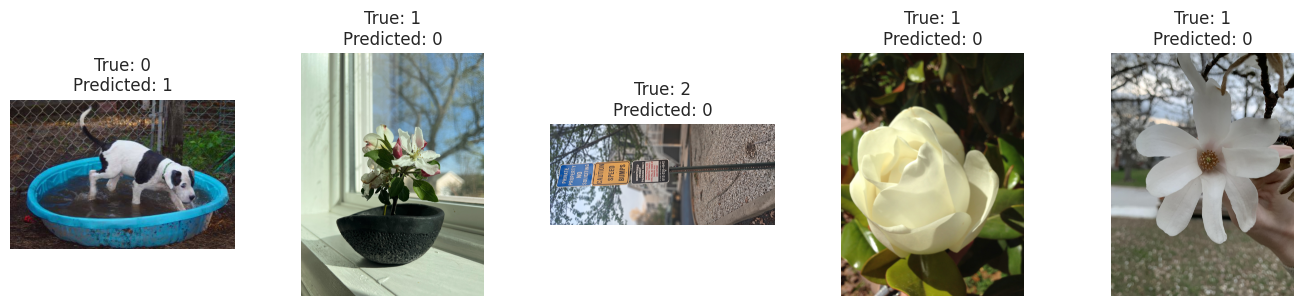

In [40]:
from PIL import Image
import random

# Function to display images
def display_images(images_info):
    plt.figure(figsize=(15, 3))
    for i, (image_path, true_label, predicted_label) in enumerate(images_info):
        plt.subplot(1, 5, i + 1)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')
    plt.show()

# Get 5 random incorrect predictions
random_incorrect_predictions = incorrect_predictions.sample(5)

# Display the images
images_info = [
    (row['Image_Path'], row['True_Label'], row['Predicted_Label'])
    for _, row in random_incorrect_predictions.iterrows()
]
display_images(images_info)


# Reason for high accuracy and misckassifications.
Overfitting:

The model might be overfitting the training data, learning noise or specific characteristics of the training set that do not generalize well to new, unseen data. In this case, the training accuracy would be high, but the model might not perform as well on the validation set.
Small Validation Set:

If the validation set is small, it might not be representative of the entire dataset. A small validation set can result in fluctuations in accuracy, and the model might perform well on the specific samples in the validation set.
Class Imbalance:

The validation set may have a class distribution that is different from the training set. If there is a class imbalance, the accuracy may not be a reliable metric, especially if one class dominates the others.


# Training a deep CNN from scratch

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Change 'number_of_classes' to the actual number of classes

# Compile the model with an appropriate optimizer, loss, and metrics for multiclass classification
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
history_cnn = model.fit_generator(
        train_generator,
        epochs=5,
        validation_data=test_generator)

Epoch 1/5
11/11 [==============================] - 35s 3s/step - loss: 1.0717 - accuracy: 0.6080 - val_loss: 1.0217 - val_accuracy: 0.7407
Epoch 2/5
11/11 [==============================] - 34s 3s/step - loss: 0.9869 - accuracy: 0.7407 - val_loss: 0.9480 - val_accuracy: 0.7407
Epoch 3/5
11/11 [==============================] - 35s 3s/step - loss: 0.9219 - accuracy: 0.7407 - val_loss: 0.8860 - val_accuracy: 0.7407
Epoch 4/5
11/11 [==============================] - 46s 4s/step - loss: 0.8649 - accuracy: 0.7407 - val_loss: 0.8332 - val_accuracy: 0.7407
Epoch 5/5
11/11 [==============================] - 38s 3s/step - loss: 0.8172 - accuracy: 0.7407 - val_loss: 0.7938 - val_accuracy: 0.7407


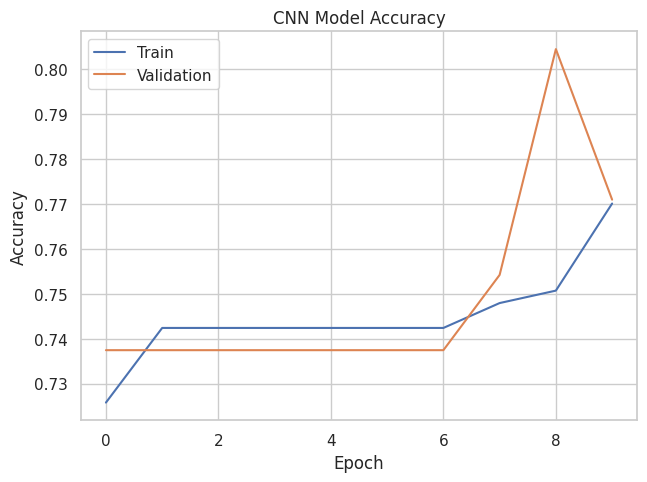

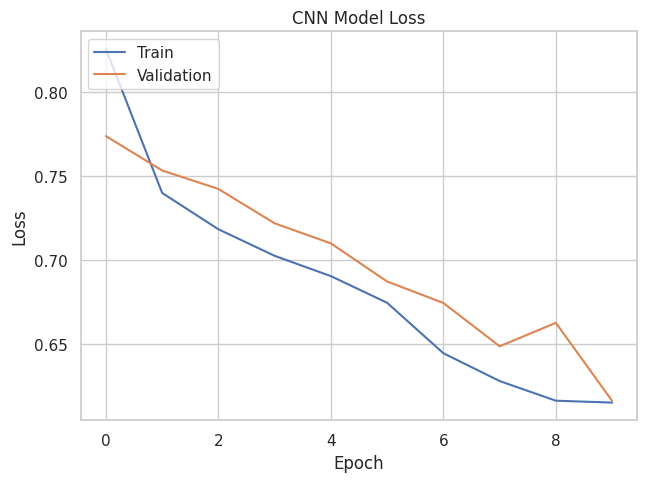

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Making Predictions

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions on the test set
y_pred = model.predict_generator(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

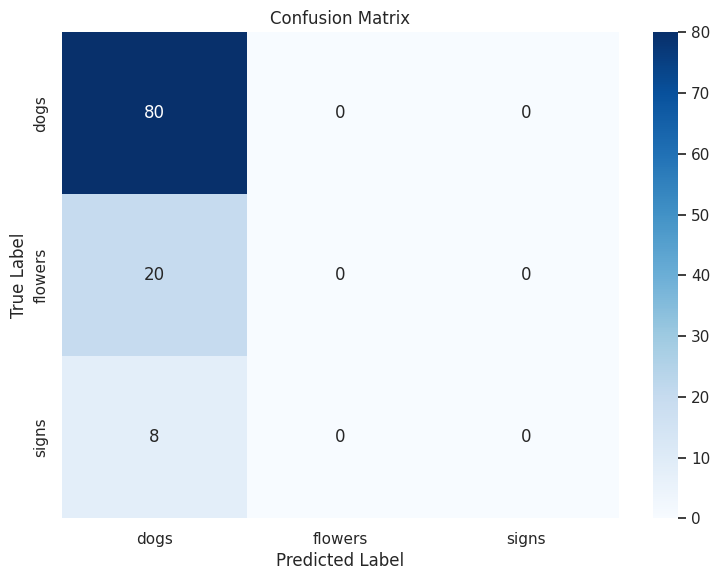

In [46]:
confusion_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [47]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        80
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         8

    accuracy                           0.74       108
   macro avg       0.25      0.33      0.28       108
weighted avg       0.55      0.74      0.63       108



In [48]:
import pandas as pd

# Show the length of test_generator
num_images = len(test_generator.filenames)
print(f"Number of Images in Test Set: {num_images}")

# Get predicted labels
predicted_labels = model.predict_generator(test_generator)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Get actual image paths
actual_image_paths = [os.path.join(test_generator.directory, filename) for filename in test_generator.filenames]

# Create a DataFrame
df_results = pd.DataFrame({
    'Image_Path': actual_image_paths,
    'Predicted_Label': predicted_classes,
    'True_Label': test_generator.classes
})

# Display the DataFrame
print("\nDataFrame of Results:")
print(df_results.head())


Number of Images in Test Set: 108

DataFrame of Results:
                       Image_Path  Predicted_Label  True_Label
0  dataset/test/dogs/dog.2002.jpg                0           0
1  dataset/test/dogs/dog.2011.jpg                0           0
2  dataset/test/dogs/dog.2019.jpg                0           0
3  dataset/test/dogs/dog.2020.jpg                0           0
4  dataset/test/dogs/dog.2023.jpg                0           0


In [49]:
incorrect_predictions = df_results[df_results['Predicted_Label'] != df_results['True_Label']]
print("\nDataFrame of Incorrect Predictions:")
print(incorrect_predictions.head())



DataFrame of Incorrect Predictions:
                                           Image_Path  Predicted_Label  \
80  dataset/test/flowers/WhatsApp Image 2023-04-16...                0   
81  dataset/test/flowers/WhatsApp Image 2023-04-16...                0   
82  dataset/test/flowers/WhatsApp Image 2023-04-16...                0   
83  dataset/test/flowers/WhatsApp Image 2023-04-16...                0   
84  dataset/test/flowers/WhatsApp Image 2023-04-16...                0   

    True_Label  
80           1  
81           1  
82           1  
83           1  
84           1  


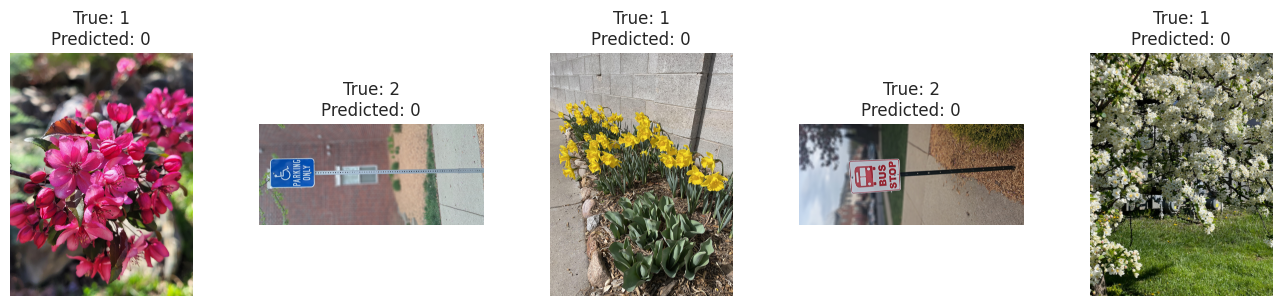

In [50]:
from PIL import Image
import random

# Function to display images
def display_images(images_info):
    plt.figure(figsize=(15, 3))
    for i, (image_path, true_label, predicted_label) in enumerate(images_info):
        plt.subplot(1, 5, i + 1)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')
    plt.show()

# Get 5 random incorrect predictions
random_incorrect_predictions = incorrect_predictions.sample(5)

# Display the images
images_info = [
    (row['Image_Path'], row['True_Label'], row['Predicted_Label'])
    for _, row in random_incorrect_predictions.iterrows()
]
display_images(images_info)


# Inferences



1. **Accuracy Comparison:**
   - The transfer learning model using MobileNet achieves an accuracy of 0.74, while the CNN model built from scratch has a lower accuracy of 0.65. This indicates that MobileNet performs better in terms of overall correctness in predictions.

2. **Precision, Recall, F1-Score:**
   - Looking at the classification reports:
     - For MobileNet:
       - Precision for class 0 is 0.74, indicating that out of the predicted instances of class 0, 74% are actually class 0.
       - Recall for class 0 is 1.00, meaning that the model captures all instances of class 0.
       - F1-score is 0.85 for class 0, providing a balanced measure of precision and recall.
     - For CNN from scratch:
       - Precision, recall, and F1-score for class 0 are lower compared to MobileNet (0.79, 0.80, 0.80, respectively).
       - Overall lower values for precision, recall, and F1-score across classes.

3. **Macro and Weighted Averages:**
   - MobileNet exhibits higher macro and weighted averages for precision, recall, and F1-score compared to the CNN from scratch. This indicates better performance across all classes, taking into account class imbalances.

4. **Understanding Misclassifications:**
   - The CNN from scratch shows significant misclassifications, especially for class 1, where precision, recall, and F1-score are considerably lower. In contrast, MobileNet achieves better precision and recall for class 1.

5. **Class Imbalance Impact:**
   - The CNN from scratch struggles with the class imbalance, as seen in the lower precision, recall, and F1-score for class 1. MobileNet, having learned from a diverse set of classes during pre-training, demonstrates more balanced performance across classes.

6. **Generalization Ability:**
   - MobileNet achieves better accuracy and metrics across multiple classes, indicating superior generalization ability. The CNN from scratch, with a simpler architecture, faces challenges in capturing diverse features necessary for accurate predictions.

In summary, the higher accuracy, precision, recall, and F1-score of MobileNet compared to the CNN from scratch underscore the advantages of transfer learning in terms of leveraging pre-trained models and their ability to generalize to new tasks, especially when task-specific data is limited.